<a href="https://colab.research.google.com/github/widawaryani/Ai_SpamDeteksi/blob/main/AI_DecissionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()



Saving spam.csv to spam.csv


Jumlah data (baris): 5572
Jumlah variabel (kolom): 3
Nama kolom: ['label', 'text', 'label_num']

Contoh data:
  label                                               text  label_num
0   ham  Go until jurong point, crazy.. Available only ...          0
1   ham                      Ok lar... Joking wif u oni...          0
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...          1
3   ham  U dun say so early hor... U c already then say...          0
4   ham  Nah I don't think he goes to usf, he lives aro...          0
== Evaluasi Awal ==
Accuracy: 0.9730941704035875

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       966
           1       0.90      0.90      0.90       149

    accuracy                           0.97      1115
   macro avg       0.94      0.94      0.94      1115
weighted avg       0.97      0.97      0.97      1115



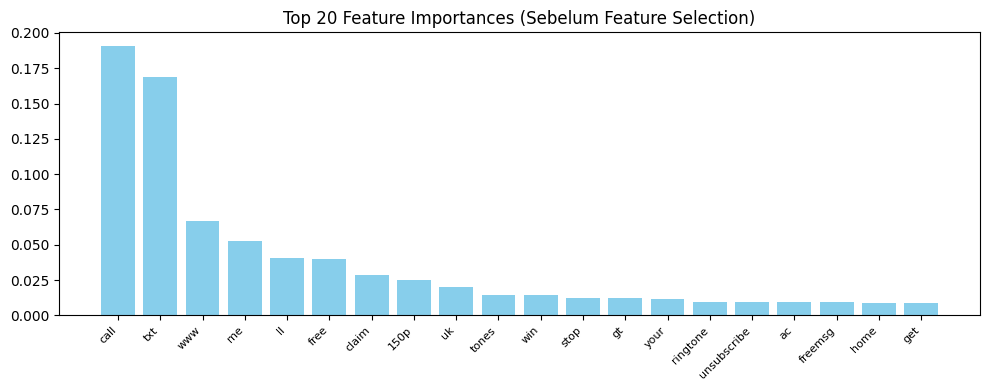


== Jumlah Fitur ==
Sebelum seleksi: 8745
Setelah seleksi: 111


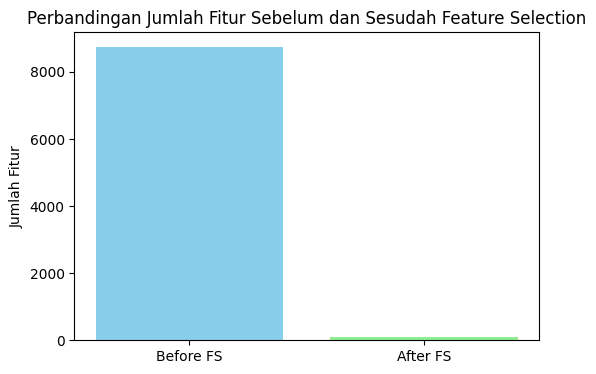


== Evaluasi Setelah Feature Selection ==
Accuracy: 0.9739910313901345

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99       966
           1       0.91      0.89      0.90       149

    accuracy                           0.97      1115
   macro avg       0.95      0.94      0.94      1115
weighted avg       0.97      0.97      0.97      1115



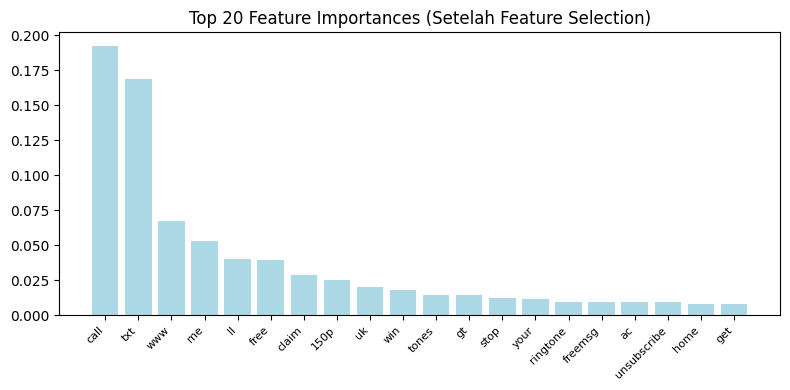

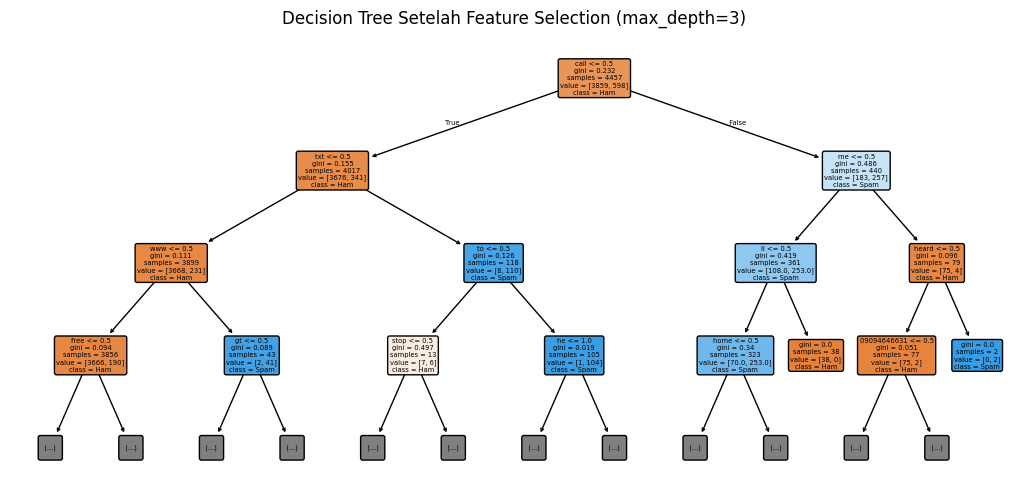

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt
import numpy as np

# Load data
df = pd.read_csv('spam.csv', encoding='latin-1')[['Category', 'Message']]
df.columns = ['label', 'text']
df['label_num'] = df.label.map({'ham': 0, 'spam': 1})

# Tampilkan info dataset
print("Jumlah data (baris):", df.shape[0])
print("Jumlah variabel (kolom):", df.shape[1])
print("Nama kolom:", df.columns.tolist())
print("\nContoh data:")
print(df.head())


# Vectorize teks
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['text'])

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, df['label_num'], test_size=0.2, random_state=42)

# Train Decision Tree awal
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Evaluasi awal
y_pred = clf.predict(X_test)
print("== Evaluasi Awal ==")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Feature importance awal
importances = clf.feature_importances_
feature_names = vectorizer.get_feature_names_out()

# Plot Feature Importance (top 20)
indices = np.argsort(importances)[::-1][:20]
plt.figure(figsize=(10,4))  # ukuran lebih kecil dari (12,6)
plt.title("Top 20 Feature Importances (Sebelum Feature Selection)", fontsize=12)
plt.bar(range(len(indices)), importances[indices], align='center', color='skyblue')
plt.xticks(range(len(indices)), [feature_names[i] for i in indices], rotation=45, ha='right', fontsize=8)
plt.tight_layout()
plt.show()

# Feature Selection berdasarkan importance (threshold rata-rata)
selector = SelectFromModel(clf, prefit=True, threshold="mean")
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)

print("\n== Jumlah Fitur ==")
print("Sebelum seleksi:", X.shape[1])
print("Setelah seleksi:", X_train_selected.shape[1])

# Visualisasi perbandingan jumlah fitur
plt.figure(figsize=(6,4))
plt.bar(['Before FS', 'After FS'], [X.shape[1], X_train_selected.shape[1]], color=['skyblue', 'lightgreen'])
plt.title("Perbandingan Jumlah Fitur Sebelum dan Sesudah Feature Selection")
plt.ylabel("Jumlah Fitur")
plt.show()

# Latih ulang model dengan fitur terseleksi
clf_selected = DecisionTreeClassifier(random_state=42)
clf_selected.fit(X_train_selected, y_train)

# Evaluasi setelah seleksi
y_pred_selected = clf_selected.predict(X_test_selected)
print("\n== Evaluasi Setelah Feature Selection ==")
print("Accuracy:", accuracy_score(y_test, y_pred_selected))
print("\nClassification Report:\n", classification_report(y_test, y_pred_selected))

# Plot Feature Importance model setelah seleksi
importances_sel = clf_selected.feature_importances_
feature_names_sel = feature_names[selector.get_support()]

indices_sel = np.argsort(importances_sel)[::-1][:20]
plt.figure(figsize=(8, 4))  # ukuran kecil dan lebar
plt.title("Top 20 Feature Importances (Setelah Feature Selection)", fontsize=12)
plt.bar(range(len(indices_sel)), importances_sel[indices_sel], color='lightblue')
plt.xticks(range(len(indices_sel)), [feature_names_sel[i] for i in indices_sel], rotation=45, ha='right', fontsize=8)
plt.tight_layout()
plt.show()

# Visualisasi pohon keputusan (max_depth=3 supaya jelas)
plt.figure(figsize=(13,6))
plot_tree(clf_selected, filled=True, max_depth=3,
          feature_names=feature_names_sel,
          class_names=["Ham", "Spam"],
          rounded=True)
plt.title("Decision Tree Setelah Feature Selection (max_depth=3)")
plt.show()
